**Authors:** <font color=brown>Jozef Hanč & his students</font>  <br>
[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN) *P.J. Šafárik University in Košice, Slovakia* <br> 
email: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)  
**Document:** Data analysis for AIP conference proceedings  
**Date**: July 2022
***

# Statistical comparisons of conferences

## parameters

In [1]:
# # list of conferences
conferences = ['didfyz2019','didfyz2021', 'DIDSCI+2022', 'ICORE2019', 'ISET2018']

## Contributions

In [2]:
# read data from files
dks = {conference:pd.read_excel('../'+conference+'-scopus.xlsx', sheet_name='contributions', index_col=0) 
       for conference in conferences}
dks.keys()

dict_keys(['didfyz2019', 'didfyz2021', 'DIDSCI+2022', 'ICORE2019', 'ISET2018'])

In [3]:
# merge data from conferences
from ast import literal_eval
dk = pd.concat(dks.values())
dk['authorslist'] = dk['authorslist'].apply(literal_eval)
dk

,title,authors,journal,authorslist,type,abstract,conference,topic,subject,keywords
0,Views of physics teachers concerning possible ...,"Leoš Dvořák, Irena Dvořáková and Věra Koudelková","AIP Conference Proceedings 2152, 020001 (2019)...","[Leoš Dvořák, Irena Dvořáková, Věra Koudelková]",invited,Due to the upcoming reform of Frame Educationa...,didfyz2019,teacher's training,physics,NaN
1,Effective individual work of pupils within phy...,Peter Demkanin and Milan Kováč,"AIP Conference Proceedings 2152, 020002 (2019)...","[Peter Demkanin, Milan Kováč]",invited,The article contributes to the results present...,didfyz2019,"inquiry skills, literacy","physics, science",NaN
2,The way of coordination - Inquiry based activi...,Stanislav Holec,"AIP Conference Proceedings 2152, 020003 (2019)...",[Stanislav Holec],invited,"The paper addresses the problems of education,...",didfyz2019,"inquiry skills, literacy",general,NaN
3,Inquiry-based science education as a support o...,"Ľubomíra Valovičová, Eva Sollárová, Jana Trník...","AIP Conference Proceedings 2152, 020004 (2019)...","[Ľubomíra Valovičová, Eva Sollárová, Jana Trní...",invited,Entering the school represent further developm...,didfyz2019,"inquiry skills, literacy",general,NaN
4,Analysis of biophysical knowledge of medical a...,Zuzana Balázsiová and Monika Mankovecká,"AIP Conference Proceedings 2152, 030001 (2019)...","[Zuzana Balázsiová, Monika Mankovecká]",other,The biophysics is included into beginning of U...,didfyz2019,other,biophysics,NaN
...,...,...,...,...,...,...,...,...,...,...
30,The study of grade 7 mental model about proper...,Pannida Meela and Chokchai Yuenyong,"AIP Conference Proceedings 2081, 030028 (2019)...","[Pannida Meela, Chokchai Yuenyong]",other,Students could represent their own mental mode...,ISET2018,"inquiry skills, literacy",physics,"mental model, MBI, gas"
31,Developing the explicit: Nature of science gen...,"Phimnaphat Pagsangkanae, Ronnapat Apitanagotin...","AIP Conference Proceedings 2081, 030029 (2019)...","[Phimnaphat Pagsangkanae, Ronnapat Apitanagoti...",other,The teaching of science in Thailand was aware ...,ISET2018,innovative curriculum,"biology, science","nature of science, GMOS, explicit, 5Es"
32,Islamic epistemology as science and philosophy...,Happy Susanto and Lia Amalia,"AIP Conference Proceedings 2081, 030030 (2019)...","[Happy Susanto, Lia Amalia]",other,The question of knowledge is the classic probl...,ISET2018,other,science,"Epistemology, Islamic Epistemology, Nationalism"
33,Khamnadeepittayakom science teachers’ concepts...,"Chaiphichit Warasith, Chokchai Yuenyong and Ta...","AIP Conference Proceedings 2081, 030031 (2019)...","[Chaiphichit Warasith, Chokchai Yuenyong, Tawe...",other,This research aimed to study Khamnadeepittayak...,ISET2018,teacher's training,science,"nature of science, teaching, attitude"


## Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

**numerical**

In [5]:
dk = dk.dropna(subset=['topic'])
dk

,title,authors,journal,authorslist,type,abstract,conference,topic,subject,keywords
0,Views of physics teachers concerning possible ...,"Leoš Dvořák, Irena Dvořáková and Věra Koudelková","AIP Conference Proceedings 2152, 020001 (2019)...","[Leoš Dvořák, Irena Dvořáková, Věra Koudelková]",invited,Due to the upcoming reform of Frame Educationa...,didfyz2019,teacher's training,physics,NaN
1,Effective individual work of pupils within phy...,Peter Demkanin and Milan Kováč,"AIP Conference Proceedings 2152, 020002 (2019)...","[Peter Demkanin, Milan Kováč]",invited,The article contributes to the results present...,didfyz2019,"inquiry skills, literacy","physics, science",NaN
2,The way of coordination - Inquiry based activi...,Stanislav Holec,"AIP Conference Proceedings 2152, 020003 (2019)...",[Stanislav Holec],invited,"The paper addresses the problems of education,...",didfyz2019,"inquiry skills, literacy",general,NaN
3,Inquiry-based science education as a support o...,"Ľubomíra Valovičová, Eva Sollárová, Jana Trník...","AIP Conference Proceedings 2152, 020004 (2019)...","[Ľubomíra Valovičová, Eva Sollárová, Jana Trní...",invited,Entering the school represent further developm...,didfyz2019,"inquiry skills, literacy",general,NaN
4,Analysis of biophysical knowledge of medical a...,Zuzana Balázsiová and Monika Mankovecká,"AIP Conference Proceedings 2152, 030001 (2019)...","[Zuzana Balázsiová, Monika Mankovecká]",other,The biophysics is included into beginning of U...,didfyz2019,other,biophysics,NaN
...,...,...,...,...,...,...,...,...,...,...
30,The study of grade 7 mental model about proper...,Pannida Meela and Chokchai Yuenyong,"AIP Conference Proceedings 2081, 030028 (2019)...","[Pannida Meela, Chokchai Yuenyong]",other,Students could represent their own mental mode...,ISET2018,"inquiry skills, literacy",physics,"mental model, MBI, gas"
31,Developing the explicit: Nature of science gen...,"Phimnaphat Pagsangkanae, Ronnapat Apitanagotin...","AIP Conference Proceedings 2081, 030029 (2019)...","[Phimnaphat Pagsangkanae, Ronnapat Apitanagoti...",other,The teaching of science in Thailand was aware ...,ISET2018,innovative curriculum,"biology, science","nature of science, GMOS, explicit, 5Es"
32,Islamic epistemology as science and philosophy...,Happy Susanto and Lia Amalia,"AIP Conference Proceedings 2081, 030030 (2019)...","[Happy Susanto, Lia Amalia]",other,The question of knowledge is the classic probl...,ISET2018,other,science,"Epistemology, Islamic Epistemology, Nationalism"
33,Khamnadeepittayakom science teachers’ concepts...,"Chaiphichit Warasith, Chokchai Yuenyong and Ta...","AIP Conference Proceedings 2081, 030031 (2019)...","[Chaiphichit Warasith, Chokchai Yuenyong, Tawe...",other,This research aimed to study Khamnadeepittayak...,ISET2018,teacher's training,science,"nature of science, teaching, attitude"


In [6]:
dtop = dk.groupby(['topic', 'conference']).count()['title'].unstack().fillna(0).astype(int)
dsub = dk.groupby(['subject', 'conference']).count()['title'].unstack().fillna(0).astype(int)
dtop.T

topic,assessment,"concepts, misconceptions",digital technology,informal education,innovative curriculum,"inquiry skills, literacy","labs, experiments",other,problem solving,projects,teacher's training
conference,,,,,,,,,,,
DIDSCI+2022,4,0,15,1,8,6,6,0,2,0,10
ISET2018,1,0,1,2,1,8,3,7,3,0,9
didfyz2019,0,5,4,2,2,7,9,7,0,3,6


In [7]:
tlabels = dtop.index.to_list()
slabels = dsub.index.to_list() #[f'{idx}.{sub}' for idx, sub in enumerate(dsub.index.to_list())]
Nt, Ns = dtop.shape[0], dsub.shape[0] 
texplode, sexplode = Nt*[0.01], Ns*[0.01]

In [8]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [9]:
cmap = plt.get_cmap("tab20c")
c = cmap(np.arange(20))
colors = [c[8], c[9], c[10], c[11], c[4], c[5], c[6], c[19], c[14], c[12], c[13], c[0],
       c[1], c[2], c[3], c[17], c[18], c[16]]

**<font color=brown size=4>Graphical summary of educational conferences: educational topic and subject of contributions**

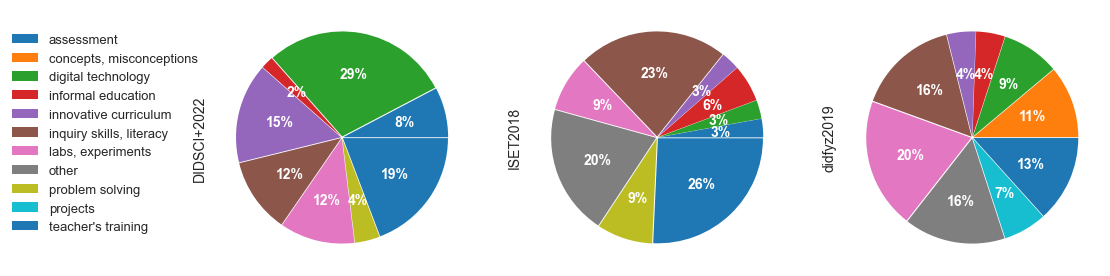

In [10]:
# visualization
display(Markdown('**<font color=brown size=4>Graphical summary of educational conferences: educational topic and subject of contributions**'))

plt.rcParams.update({'font.size': 14});

dtop.plot(kind='pie',subplots=True, 
        figsize=(16,6), legend=True, labels = None,
        autopct=lambda p: '{:.0f}%'.format(p) if p > 1 else None, textprops={'fontsize': 14, 'color': 'w',  'weight':'bold'}, explode = texplode);
plt.legend(loc=3, labels=tlabels, bbox_to_anchor = (-3.2,0.09), fontsize = 13);

In [11]:
#slabels2 = [slabels[lab] for lab in [11,12,13,14, 4,5,6, 0,1,2,3,9,10,8, 17,15,16,7]]

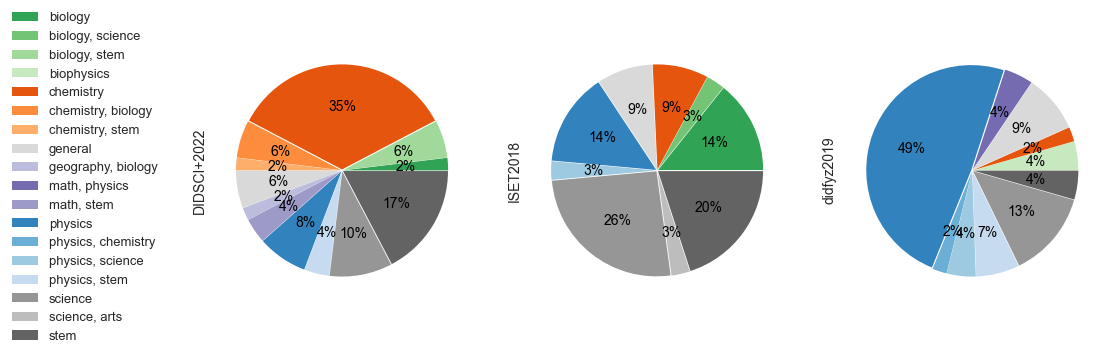

In [12]:
dsub.plot(kind='pie',subplots=True, 
        figsize=(16,6), legend=True, labels = None, colors=colors,
        autopct=lambda p: '{:.0f}%'.format(p) if p > 1 else None, textprops={'fontsize': 14, 'color': 'black'}, explode = sexplode);

plt.legend(loc=3, labels=slabels, bbox_to_anchor = (-3.2,-0.2), fontsize = 13);

## Scopus data

In [13]:
# read data from files
dss = {conference:pd.read_excel('../'+conference+'-scopus.xlsx', sheet_name='h-index', index_col=0) 
       for conference in conferences}
dss.keys()

dict_keys(['didfyz2019', 'didfyz2021', 'DIDSCI+2022', 'ICORE2019', 'ISET2018'])

In [14]:
# merge data from conferences
ds = pd.concat(dss.values())
# scopus-id as integer
ds['scopus-id'] = ds['scopus-id'].astype('Int64')  
ds

,scopus-id,first name,last name,full name,documents,citations,h-index,contribution,conference
0,16502656800,Leoš,Dvořák,Leoš Dvořák,17,112,4,invited,didfyz2019
1,57210119714,Irena,Dvořáková,Irena Dvořáková,6,0,0,invited,didfyz2019
2,6602464943,Věra,Koudelková,Věra Koudelková,7,8,1,invited,didfyz2019
3,56157041700,Peter,Demkanin,Peter Demkanin,7,9,3,invited,didfyz2019
4,57211071391,Milan,Kováč,Milan Kováč,3,3,1,invited,didfyz2019
...,...,...,...,...,...,...,...,...,...
71,57207842238,Chaiphichit,Warasith,Chaiphichit Warasith,1,1,1,other,ISET2018
72,56226867700,Tawee,Sranamkam,Tawee Sranamkam,9,5,1,other,ISET2018
73,57207848743,R. E.,Putera,R. E. Putera,1,0,0,other,ISET2018
74,57207844069,Heru,Nurasa,Heru Nurasa,8,2,1,other,ISET2018


## Analysis

**numerical**

In [15]:
# quartiles and IQR
q25 = lambda x: x.quantile(0.25) # lower quartile
q50 = lambda x: x.quantile(0.50) # upper quartile
q75 = lambda x: x.quantile(0.75) # upper quartile
IQR = lambda x: x.quantile(0.75)-x.quantile(0.25) # interquartile range

# # counts h-index of contributions - invited vs. others
# dhc = (df.groupby(['conference','contribution', 'h-index'])
#       .agg(count = ('scopus-id','count')).rename(columns={'contribution':'participant'})).T

# h-index of contributions - invited vs. others
dhs = (ds.groupby(['conference','contribution'])
.agg({'h-index':['mean', 'std', 'min', q25, q50, q75, 'max']})
.round(1)
      )

dhall = (ds.groupby(['conference'])
           .agg({'h-index':['mean', 'std', 'min', q25, q50, q75, 'max']})
           .round(1)
           .rename(columns={'h-index':'all'})
           .rename_axis('contribution'))

# measures
measures = ['mean', 'std', 'minimum', '25%', '50%', '75%', 'maximum']
level = f'$h$-index'
dhs.columns = pd.MultiIndex.from_tuples([(level, stat) for stat in measures])
dhall.columns = pd.MultiIndex.from_tuples([(level, stat) for stat in measures])
dhall.index = pd.MultiIndex.from_tuples([(conf, 'all') for conf in dhall.index])

dh = pd.concat([dhs, dhall]).sort_index()
dh.iloc[:,2:6] = dh.iloc[:,2:6].astype(int)

# display numerical summary
print()
display(Markdown(f'**<font color=brown size=4>Numerical summary: Scopus $h$-index of participants from all conferences**'))
display(dh.T)

**<font color=brown size=4>Numerical summary: Scopus $h$-index of participants from all conferences**

conference        DIDSCI+2022               ICORE2019               ISET2018  \
contribution              all invited other       all invited other      all   
$h$-index mean            3.4     5.0   3.4       4.8     7.1   3.9      1.9   
          std             4.8     3.0   4.8       6.7     6.9   6.5      2.8   
          minimum         0.0     2.0   0.0       0.0     0.0   0.0      0.0   
          25%             0.0     2.0   0.0       1.0     1.0   1.0      0.0   
          50%             2.0     6.0   2.0       2.0     5.0   2.0      1.0   
          75%             4.0     6.0   4.0       6.0    11.0   5.0      2.0   
          maximum        20.0     9.0  20.0      47.0    29.0  47.0     11.0   

conference                      didfyz2019               didfyz2021          \
contribution      invited other        all invited other        all invited   
$h$-index mean        6.6   1.6        2.4     1.9   2.5        2.0     2.8   
          std         5.1   2.3        3.1     1.3   3.3        3.4     2.4   
          minimum     1.0   0.0        0.0     0.0   0.0        0.0     0.0   
          25%         1.0   0.0        1.0     1.0   1.0        0.0     1.0   
          50%        10.0   1.0        1.0     1.0   1.0        1.0     3.0   
          75%        10.0   2.0        3.0     3.0   3.0        2.0     3.0   
          maximum    11.0  11.0       16.0     4.0  16.0       19.0     9.0   

conference               
contribution      other  
$h$-index mean      1.9  
          std       3.5  
          minimum   0.0  
          25%       0.0  
          50%       1.0  
          75%       2.0  
          maximum  19.0

**graphical**

In [16]:
# ymax = dh[(level,'median')].max() + 2*dh[(level,'IQ range')].max()
# ymin = dh[(level,'minimum')].min()
ymin , ymax = 0, 12

**<font color=brown size=4>Graphical summary: Scopus $h$-index of participants from all conferences**

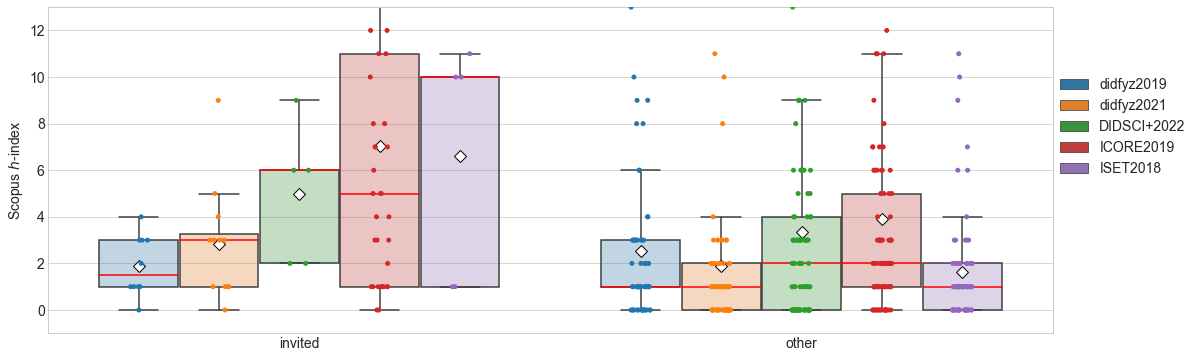

In [17]:
# visualization
print()
md(f'**<font color=brown size=4>Graphical summary: Scopus $h$-index of participants from all conferences**')
fig, axes = plt.subplots(figsize=(18,6))

# plots
g1 = sns.boxplot( x='contribution', y='h-index', data=ds, ax=axes, hue='conference', medianprops=dict(color="red", linewidth=1.5), showfliers = False, 
                showmeans=True, meanprops={"marker": "D", "markerfacecolor":"white", 
                       "markeredgecolor":"black", "markersize": "8"})
 
    # more transparent colors for boxplots
for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

g2 = sns.stripplot(x='contribution', y='h-index', data=ds, size=5, alpha=1, hue='conference', dodge=True)

# fonts and labels
plt.ylim(-1+ymin,1+ymax)
plt.xlabel(''); plt.ylabel('Scopus $h$-index', fontsize=14)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

# plot legend
handles, labels = axes.get_legend_handles_labels()
plt.legend(handles[0:len(conferences)], labels[0:len(conferences)], loc="upper center", bbox_to_anchor = (1.07,0.8), fontsize=14, borderaxespad = 0.)
plt.show();

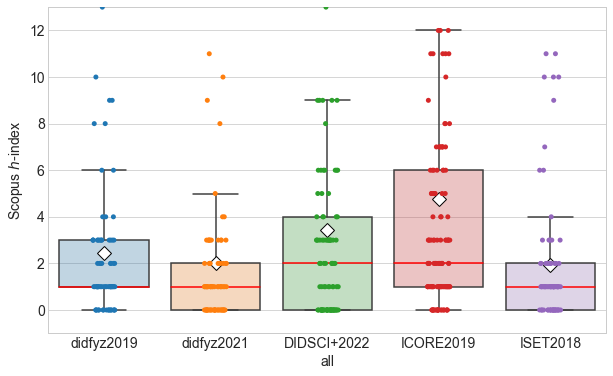

In [18]:
# visualization
fig, axes = plt.subplots(figsize=(10,6))

# plots
axes = sns.boxplot(x='conference', y='h-index', data = ds, ax=axes,  medianprops=dict(color="red", linewidth=1.5), showfliers = False, 
                showmeans=True, meanprops={"marker": "D", "markerfacecolor":"white", 
                       "markeredgecolor":"black", "markersize": "10"})    

    # more transparent colors for boxplots
for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

axes = sns.stripplot(y='h-index', x = 'conference',  data = ds, size = 5, alpha  = 1)

# fonts and labels
plt.ylim(-1+ymin,1+ymax)
plt.xlabel('all', fontsize=14); plt.ylabel('Scopus $h$-index', fontsize=14)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.show();